In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, time
import os, sys
import pandas as pd
from scipy.interpolate import interp1d

sys.path.append('../')
import NEXUSFunctions as nf

import matplotlib.dates as mdates
from   pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The starting date is: 
2024-03-05 00:00:00


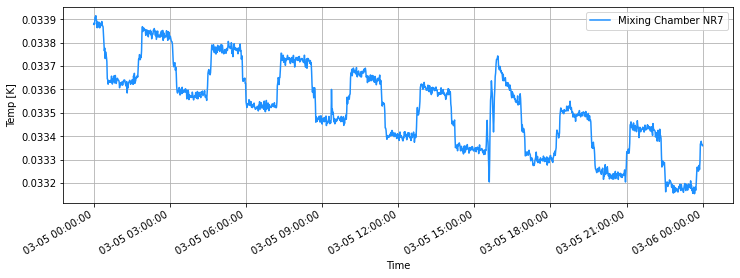

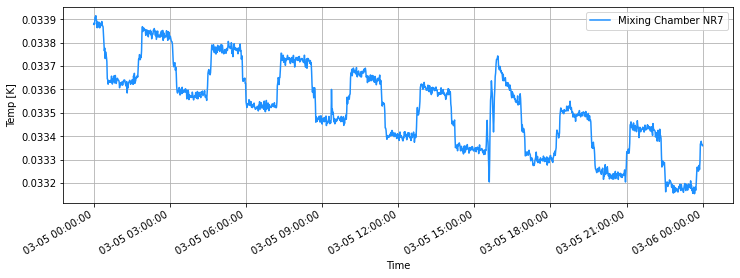

In [6]:
# nf.poll_and_plot_MACRT("2022-04-19",1)
nf.poll_and_plot_MACRT("2024-03-05",1)

In [7]:
# series    = nf.create_date_range("2022-04-19",1)
series    = nf.create_date_range("2024-03-05",1)
offset_0  = datetime.timedelta(days=0, hours=0, minutes=0)
offset_ls = datetime.timedelta(days=0, hours=-5, minutes=0)

The starting date is: 
2024-03-05 00:00:00


In [19]:
res_mc  = nf.read_MACRT_data(series, offset_0)
res_ls_ = nf.read_Lakeshore_data(series, offset_ls)
res_ls  = nf.select_Lakeshore_channel(res_ls_,4)
dcp_ls  = nf.select_Lakeshore_channel(res_ls_,5)

../NEXUSFunctions.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Temperature'] = ch_temps
../NEXUSFunctions.py:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['Temperature'] = ch_temps


In [22]:
## Get rolling average of the Lakeshore data
N_avg_pts = 100

ls_avg = np.array([ np.mean(res_ls['Temperature'][i-int(N_avg_pts/2):i+int(N_avg_pts/2)]) 
                   for i in np.arange(int(N_avg_pts/2),len(res_ls['Temperature'])-int(N_avg_pts/2)) ])

dc_avg = np.array([ np.mean(dcp_ls['Temperature'][i-int(N_avg_pts/2):i+int(N_avg_pts/2)]) 
                   for i in np.arange(int(N_avg_pts/2),len(dcp_ls['Temperature'])-int(N_avg_pts/2)) ])

times_avg = res_ls['ctime'][int(N_avg_pts/2):-int(N_avg_pts/2)]

<IPython.core.display.Javascript object>


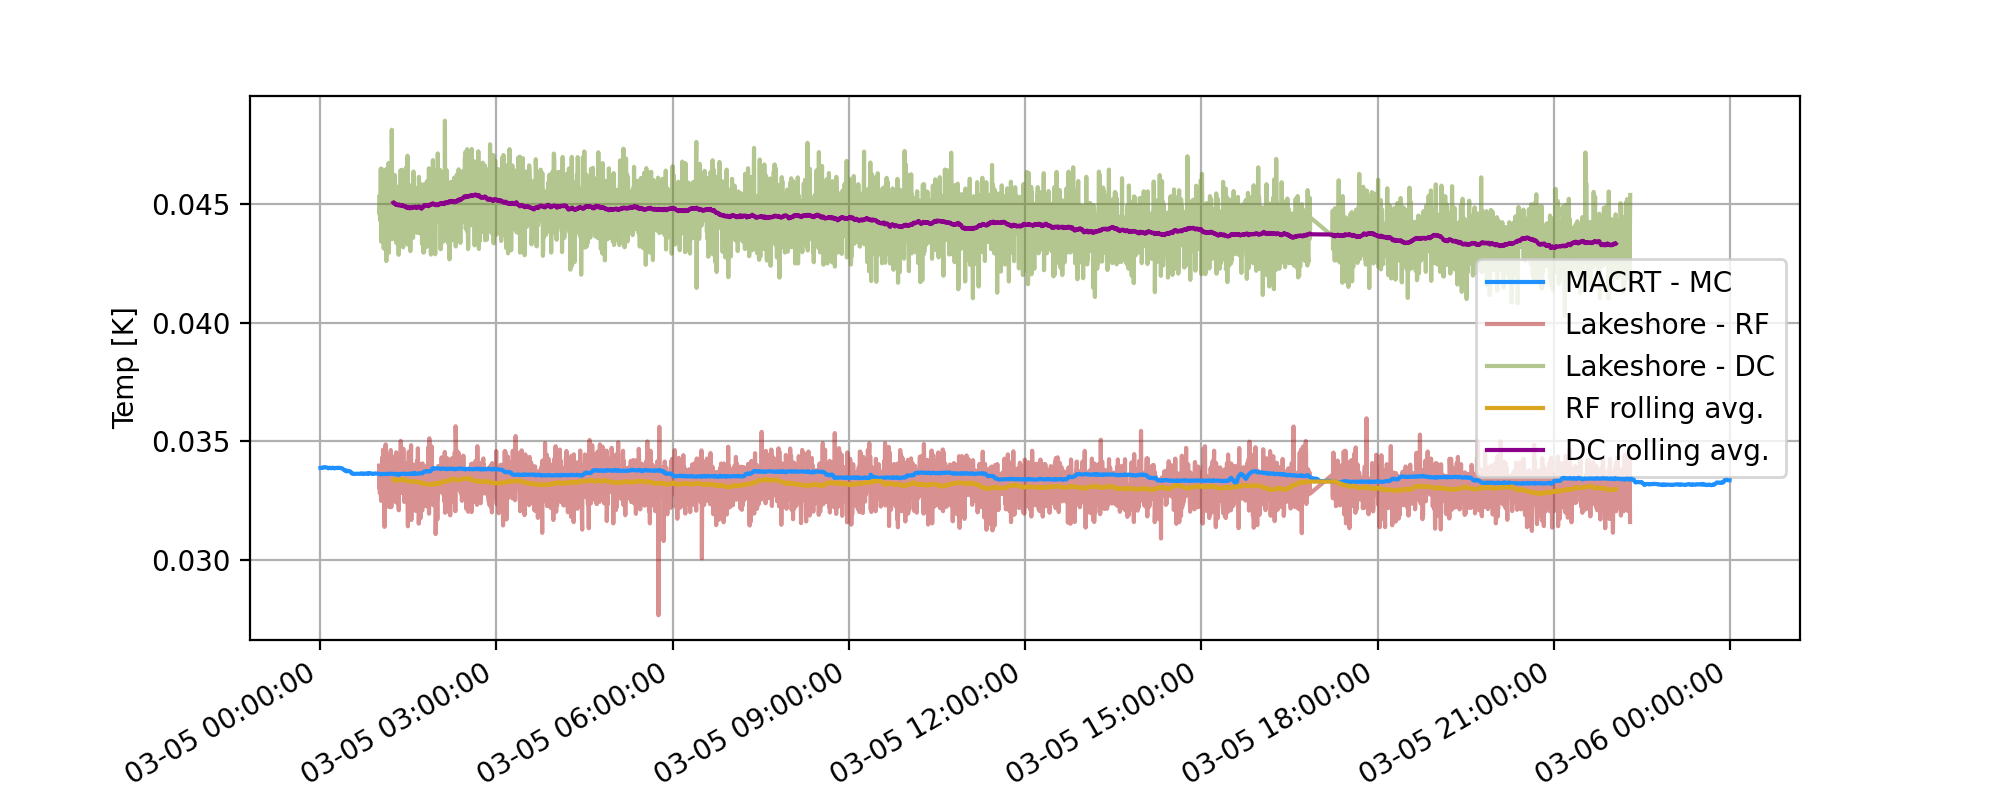

In [23]:
%matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel('Temp [K]')

## Plot the MACRT data
a.plot(res_mc['ctime'], res_mc['MIXING CHAMB_Conv'], label='MACRT - MC', color='dodgerblue', zorder=10)

## Plot the Lakeshore data
a.plot(res_ls['ctime'], res_ls['Temperature'], label='Lakeshore - RF', color='firebrick', alpha=0.5)
a.plot(dcp_ls['ctime'], dcp_ls['Temperature'], label='Lakeshore - DC',    color='olivedrab', alpha=0.5)

## Plot the Lakeshore average
a.plot(times_avg, ls_avg, label='RF rolling avg.', color='goldenrod', zorder=100)
a.plot(times_avg, dc_avg, label='DC rolling avg.', color='darkmagenta', zorder=100)

plt.grid()
plt.legend(loc="best")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)

In [ ]:
t0 = datetime.datetime(2022,4,19,10,10,0)
t1 = datetime.datetime(2022,4,19,18,18,0)

mc_times = res_mc['ctime'].loc[(res_mc['ctime']>t0) & (res_mc['ctime']<t1)]
mc_temps = res_mc['MIXING CHAMB_Conv'].loc[(res_mc['ctime']>t0) & (res_mc['ctime']<t1)]

mc_timestamps = [time.mktime(d.timetuple()) for d in mc_times]
mc_interp = interp1d(mc_timestamps, mc_temps, bounds_error=False, fill_value='extrapolate')

ls_times = res_ls['ctime'].loc[(res_ls['ctime']>t0) & (res_ls['ctime']<t1)]
ls_temps = res_ls['Temperature'].loc[(res_ls['ctime']>t0) & (res_ls['ctime']<t1)]

ls_timestamps = [time.mktime(d.timetuple()) for d in ls_times]
print(len(ls_temps),len(ls_timestamps))
delta = ls_temps - mc_interp(ls_timestamps)
print(len(delta))

In [ ]:
%matplotlib inline
f = plt.figure(figsize = (12,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel(r'$\Delta T$ (Lakeshore-MACRT) [K]')

## Plot the MACRT data
a.plot(ls_times, delta, color='indigo')

plt.grid()
# plt.legend(loc="best")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)

In [ ]:
def cleaner(strng):
    return float(strng.split(" ")[0])

In [ ]:
# %matplotlib notebook
f = plt.figure(figsize = (10,4))
a = plt.gca()
a.set_xlabel('Time')
a.set_ylabel(r'Resistance [$\Omega$]')

# ## Plot the MACRT data
# a.plot(res_mc['ctime'], res_mc['MIXING CHAMB_Conv'], label='MACRT - MC', color='dodgerblue')

## Plot the Lakeshore data
a.plot(res_ls['ctime'], res_ls['Resistance'].apply(cleaner), label='Resistance - MC/RF', color='firebrick')

b = a.twinx()
b.plot(res_ls['ctime'], res_ls['Temperature'], label='Lakeshore - MC/RF', color='dodgerblue')
b.set_ylabel("Temperature [K]")

plt.grid()
plt.legend(loc="right")
f.autofmt_xdate()
myFmt = mdates.DateFormatter('%m-%d %H:%M:%S')
a.xaxis.set_major_formatter(myFmt)